In [6]:
import os
from matplotlib import pyplot as plt
import numpy as np
import analysis_kaggle_feedback as akf

resource_dir = "./predictions/gold"
cluster_files = [directory+'/'+file for directory, _, files in os.walk(resource_dir) for file in files]

In [7]:
# specify the labels to consider
labels = ['Lead', 'Position', 'Claim', 'Counterclaim', 'Rebuttal', 'Evidence', 'Concluding Statement']
labels_short = ['Lead', 'Pos', 'Claim', 'Co-claim', 'Rb', 'Ev', 'CS']

cluster_analyses = [akf.analyse_cluster(cf, labels) for cf in cluster_files]

Read 685 rows of ./predictions/gold/gold/test_3.csv
Read 748 rows of ./predictions/gold/gold/test_0.csv
Read 1333 rows of ./predictions/gold/gold/test_4.csv
Read 736 rows of ./predictions/gold/gold/test_1.csv
Read 1826 rows of ./predictions/gold/gold/test_13.csv
Read 737 rows of ./predictions/gold/gold/test_6.csv
Read 616 rows of ./predictions/gold/gold/test_14.csv
Read 500 rows of ./predictions/gold/gold/test_7.csv
Read 638 rows of ./predictions/gold/gold/test_10.csv
Read 1148 rows of ./predictions/gold/gold/test_12.csv
Read 1700 rows of ./predictions/gold/gold/test_2.csv
Read 904 rows of ./predictions/gold/gold/test_9.csv
Read 971 rows of ./predictions/gold/gold/test_8.csv
Read 859 rows of ./predictions/gold/gold/test_11.csv
Read 1294 rows of ./predictions/gold/gold/test_5.csv


All files


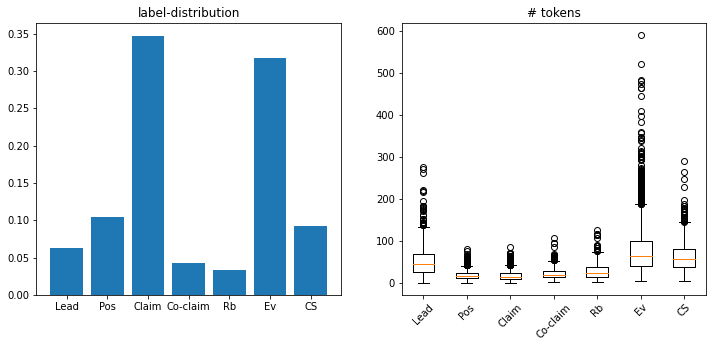

In [8]:
total_label_counts = [0] * len(labels)
total_word_counts = {}
for label in labels:
    total_word_counts[label] = []

for label_counts, word_counts in cluster_analyses:
    for i, lc in enumerate(label_counts):
        total_label_counts[i] += lc

    for label in labels:
        total_word_counts[label] += word_counts[label]

print("All files")
akf.plot_lf_wc(akf.normalize(total_label_counts), total_word_counts, labels_short)

./predictions/gold/gold/test_3.csv


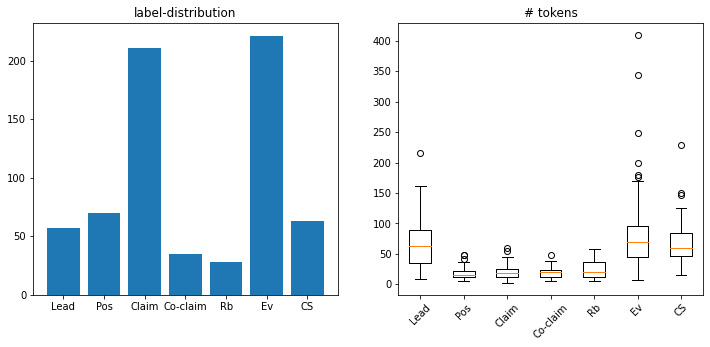

./predictions/gold/gold/test_0.csv


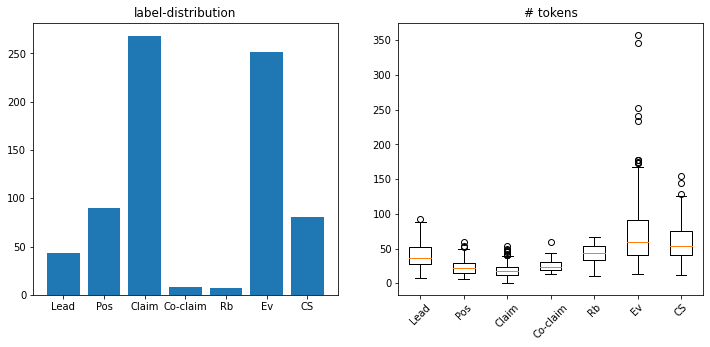

./predictions/gold/gold/test_4.csv


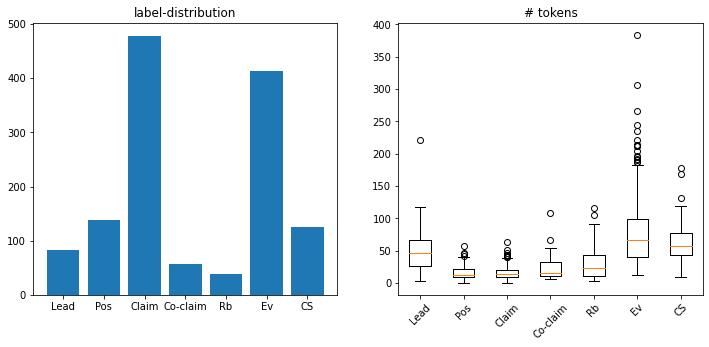

./predictions/gold/gold/test_1.csv


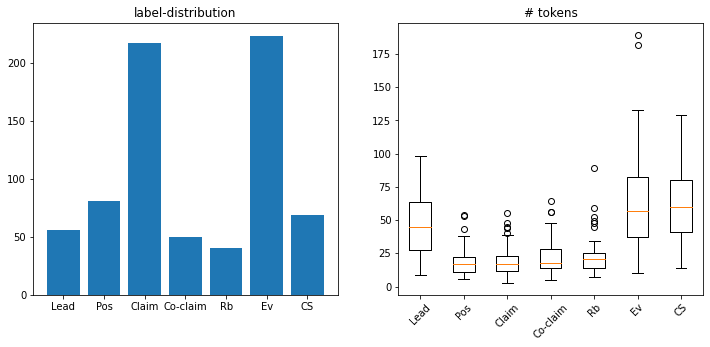

./predictions/gold/gold/test_13.csv


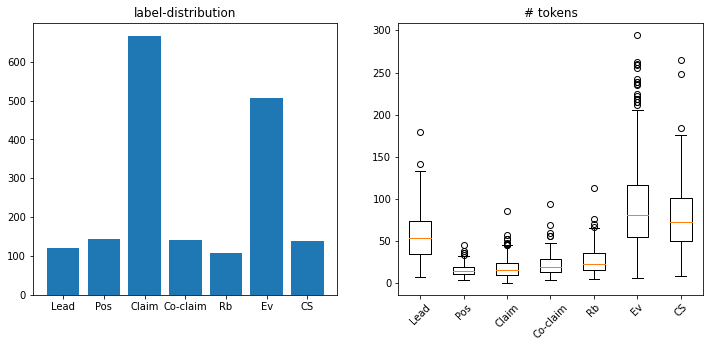

./predictions/gold/gold/test_6.csv


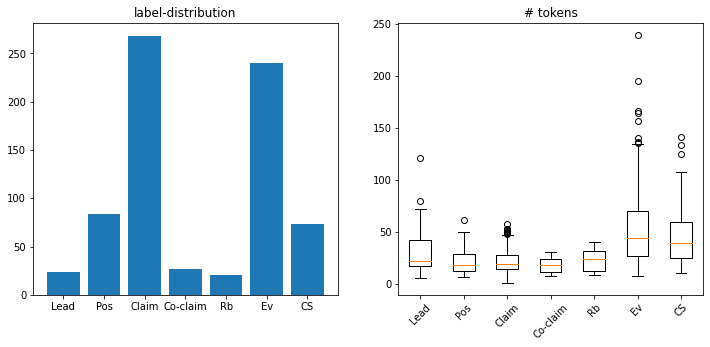

./predictions/gold/gold/test_14.csv


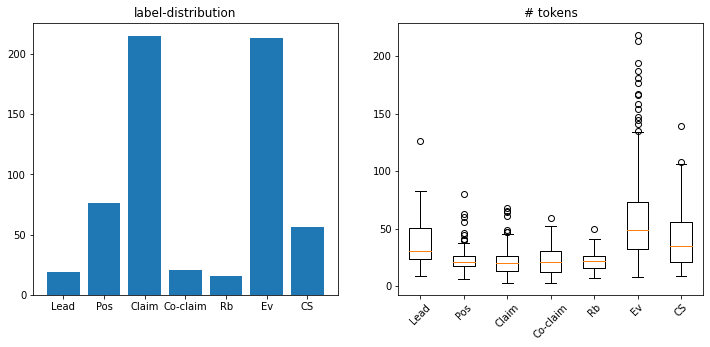

./predictions/gold/gold/test_7.csv


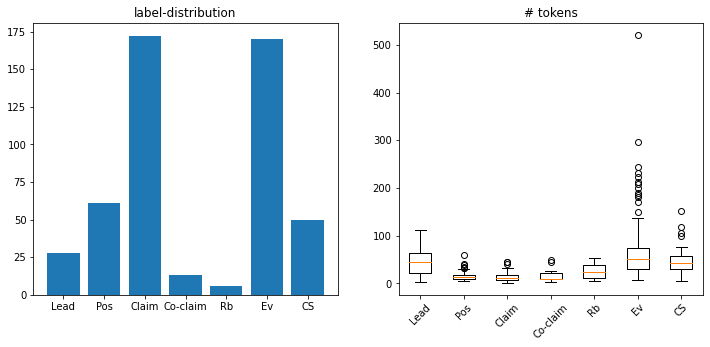

./predictions/gold/gold/test_10.csv


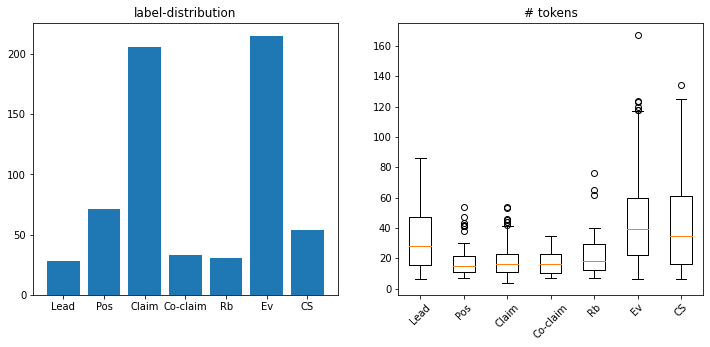

./predictions/gold/gold/test_12.csv


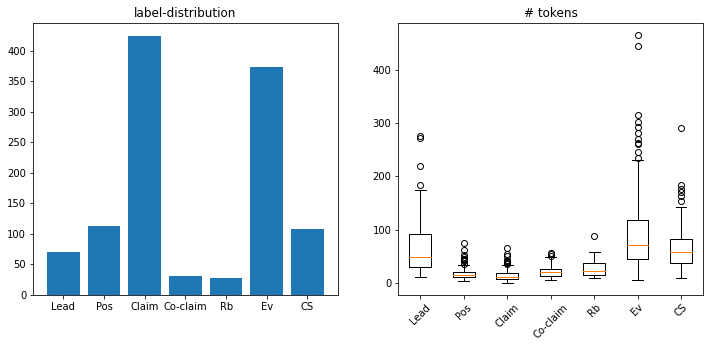

./predictions/gold/gold/test_2.csv


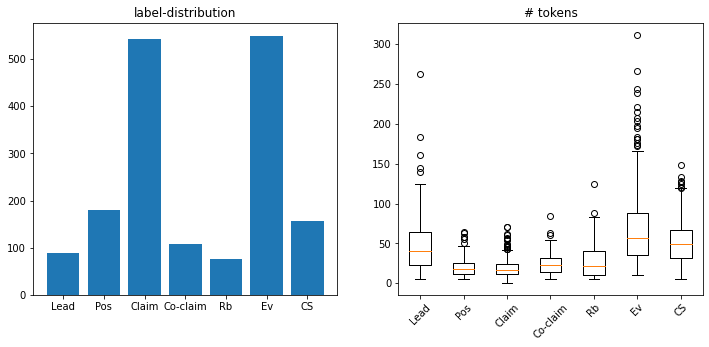

./predictions/gold/gold/test_9.csv


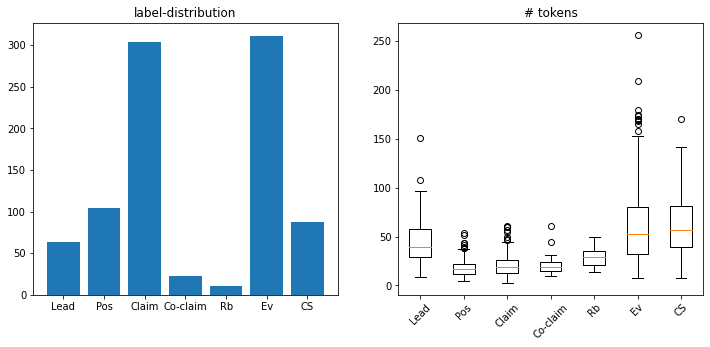

./predictions/gold/gold/test_8.csv


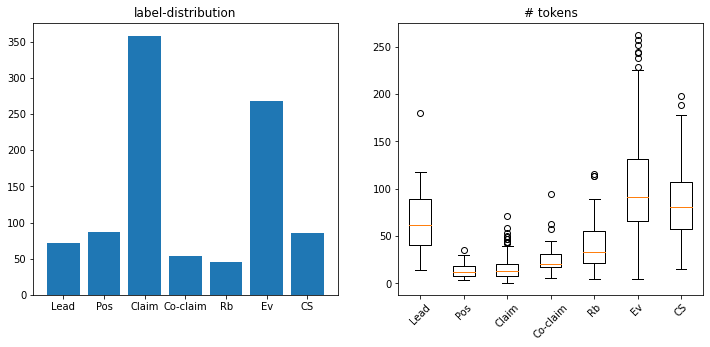

./predictions/gold/gold/test_11.csv


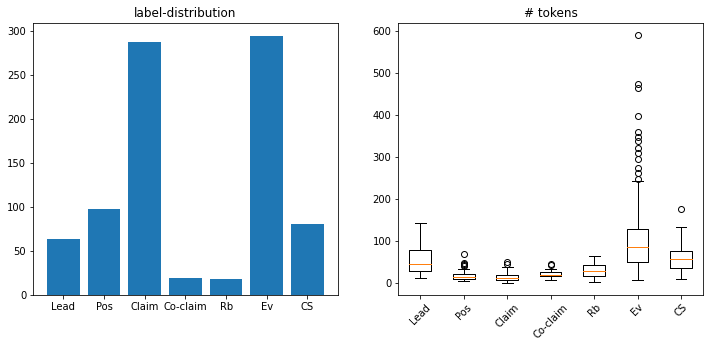

./predictions/gold/gold/test_5.csv


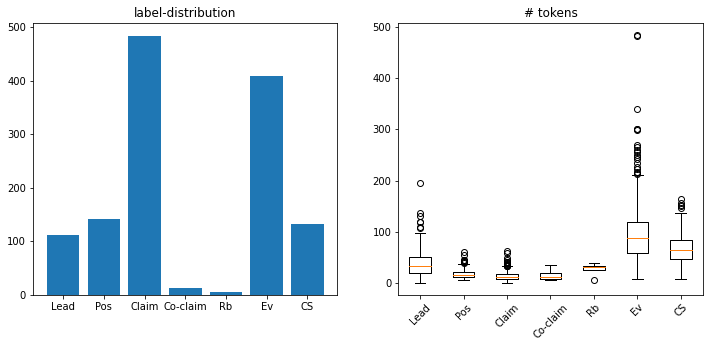

In [9]:
for i, (label_counts, word_counts) in enumerate(cluster_analyses):
    print(cluster_files[i])
    label_freq = akf.normalize(label_counts)
    akf.plot_lf_wc(label_counts, word_counts, labels_short)

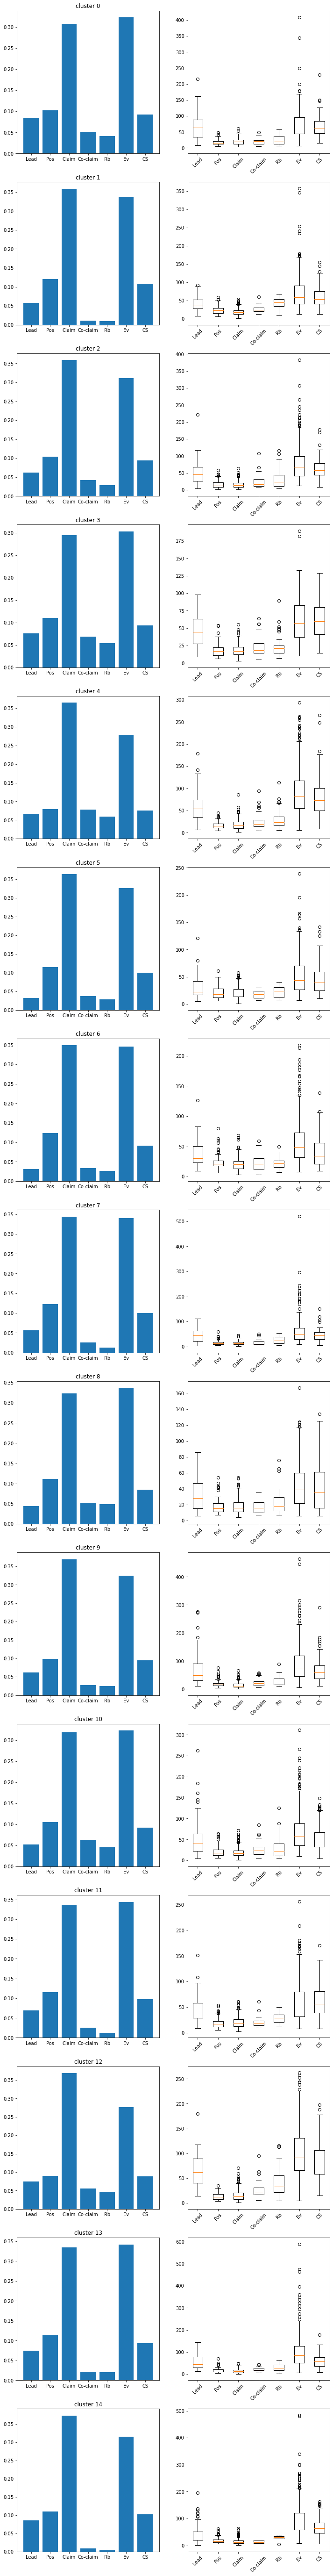

In [10]:
akf.plot_all_clusters(cluster_analyses, labels_short)